In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv(r"/content/customer_booking.csv", encoding="ISO-8859-1")
df.sample(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
28772,1,Internet,RoundTrip,25,3,11,Tue,MYYSYD,United Kingdom,0,0,0,8.58,0
31694,1,Mobile,RoundTrip,0,4,0,Wed,HKGSYD,Australia,0,1,0,8.58,0
27583,2,Internet,RoundTrip,62,3,1,Thu,HKTICN,South Korea,0,0,0,6.62,0
4783,1,Internet,RoundTrip,170,19,1,Mon,CMBMEL,Australia,1,1,1,8.83,0
12604,1,Internet,RoundTrip,39,18,8,Sat,HNDPEN,Japan,1,0,1,7.57,0
20305,1,Internet,RoundTrip,146,22,1,Wed,MELSGN,Australia,1,1,1,8.83,0
13452,1,Internet,RoundTrip,16,43,16,Tue,HYDSYD,Australia,1,0,0,8.58,0
36971,2,Internet,RoundTrip,86,5,14,Sun,DMKKIX,Thailand,1,0,0,7.00,0
43095,1,Internet,RoundTrip,245,6,2,Tue,CGKHND,Indonesia,0,0,1,7.57,1
18931,1,Internet,RoundTrip,98,33,11,Sat,MELPEN,Australia,1,0,1,8.83,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:<br>

num_passengers = number of passengers travelling<br>
sales_channel = sales channel booking was made on<br>
trip_type = trip Type (Round Trip, One Way, Circle Trip)<br>
purchase_lead = number of days between travel date and booking date<br>
length_of_stay = number of days spent at destination<br>
flight_hour = hour of flight departure<br>
flight_day = day of week of flight departure<br>
route = origin -> destination flight route<br>
booking_origin = country from where booking was made<br>
wants_extra_baggage = if the customer wanted extra baggage in the booking<br>
wants_preferred_seat = if the customer wanted a preferred seat in the booking<br>
wants_in_flight_meals = if the customer wanted in-flight meals in the booking<br>
flight_duration = total duration of flight (in hours)<br>
booking_complete = flag indicating if the customer completed the booking<br>

In [ ]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
df.duplicated().sum()

719

In [ ]:
# to remove duplicate cells
df = df.drop_duplicates()
df.duplicated().sum()

0

# Feature Engneering

In [ ]:
#converting flight day into a numerical value btwn 1 and 7
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)
df["flight_day"].sample(5)

14223    2
25596    2
46634    6
5522     6
49970    7
Name: flight_day, dtype: int64

In [ ]:
print(df["sales_channel"].unique())
print(df["trip_type"].unique())


['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']


In [32]:
print(df["num_passengers"].unique())


[2 1 3 4 6 5 7 9 8]


In [48]:
df['booking_complete'].value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

In [49]:
df2 = pd.get_dummies(df, columns=['sales_channel']) # dummy variables for the sales channel column
df2.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile
0,2,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0
1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0
2,2,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0
3,1,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0
4,2,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0


In [50]:
df2 = pd.get_dummies(df2, columns=['trip_type']) # dummy variables for the trip_type column
df2.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          49281 non-null  int64  
 1   purchase_lead           49281 non-null  int64  
 2   length_of_stay          49281 non-null  int64  
 3   flight_hour             49281 non-null  int64  
 4   flight_day              49281 non-null  int64  
 5   route                   49281 non-null  object 
 6   booking_origin          49281 non-null  object 
 7   wants_extra_baggage     49281 non-null  int64  
 8   wants_preferred_seat    49281 non-null  int64  
 9   wants_in_flight_meals   49281 non-null  int64  
 10  flight_duration         49281 non-null  float64
 11  booking_complete        49281 non-null  int64  
 12  sales_channel_Internet  49281 non-null  uint8  
 13  sales_channel_Mobile    49281 non-null  uint8  
 14  trip_type_CircleTrip    49281 non-null

In [52]:
df2=df2.drop(['num_passengers','route','booking_origin'], axis=1) #dropping unncessary columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_lead           49281 non-null  int64  
 1   length_of_stay          49281 non-null  int64  
 2   flight_hour             49281 non-null  int64  
 3   flight_day              49281 non-null  int64  
 4   wants_extra_baggage     49281 non-null  int64  
 5   wants_preferred_seat    49281 non-null  int64  
 6   wants_in_flight_meals   49281 non-null  int64  
 7   flight_duration         49281 non-null  float64
 8   booking_complete        49281 non-null  int64  
 9   sales_channel_Internet  49281 non-null  uint8  
 10  sales_channel_Mobile    49281 non-null  uint8  
 11  trip_type_CircleTrip    49281 non-null  uint8  
 12  trip_type_OneWay        49281 non-null  uint8  
 13  trip_type_RoundTrip     49281 non-null  uint8  
dtypes: float64(1), int64(8), uint8(5)
memo

In [53]:
df2.head()

,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,262,19,7,6,1,0,0,5.52,0,1,0,0,0,1
1,112,20,3,6,0,0,0,5.52,0,1,0,0,0,1
2,243,22,17,3,1,1,0,5.52,0,1,0,0,0,1
3,96,31,4,6,0,0,1,5.52,0,1,0,0,0,1
4,68,22,15,3,1,0,1,5.52,0,1,0,0,0,1


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_lead           49281 non-null  int64  
 1   length_of_stay          49281 non-null  int64  
 2   flight_hour             49281 non-null  int64  
 3   flight_day              49281 non-null  int64  
 4   wants_extra_baggage     49281 non-null  int64  
 5   wants_preferred_seat    49281 non-null  int64  
 6   wants_in_flight_meals   49281 non-null  int64  
 7   flight_duration         49281 non-null  float64
 8   booking_complete        49281 non-null  int64  
 9   sales_channel_Internet  49281 non-null  uint8  
 10  sales_channel_Mobile    49281 non-null  uint8  
 11  trip_type_CircleTrip    49281 non-null  uint8  
 12  trip_type_OneWay        49281 non-null  uint8  
 13  trip_type_RoundTrip     49281 non-null  uint8  
dtypes: float64(1), int64(8), uint8(5)
memo

In [55]:
df2.describe()

,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,84.723281,23.053976,9.070676,3.813620,0.668229,0.295631,0.426635,7.279974,0.149977,0.891155,0.108845,0.002354,0.007833,0.989814
std,90.410229,33.832149,5.413099,1.991913,0.470854,0.456331,0.494593,1.496390,0.357052,0.311448,0.311448,0.048460,0.088156,0.100414
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df2= df2.sample(frac=1, replace=True, weights=df2['booking_complete'].value_counts())

# Check the class distribution again
df2['booking_complete'].value_counts()

0    49281
Name: booking_complete, dtype: int64

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    
    classification_report,
    precision_recall_curve
)

In [44]:
X = df2.drop(columns=['booking_complete'])
y = df2['booking_complete']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
!pip install imbalanced-learn


In [57]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [58]:
oversampler = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

In [68]:
lg_oversampled = LogisticRegression(random_state=42)
lg_oversampled.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = lg_oversampled.predict(X_test)
print("Classification Report - Oversampled Data:")
print(classification_report(y_test, y_pred_oversampled))

# Train and evaluate a classifier on the undersampled data
lg_undersampled = LogisticRegression(random_state=42)
lg_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = lg_undersampled.predict(X_test)
print("Classification Report - Undersampled Data:")
print(classification_report(y_test, y_pred_undersampled))

Classification Report - Oversampled Data:
              precision    recall  f1-score   support

           0       0.90      0.58      0.71      8379
           1       0.21      0.62      0.31      1478

    accuracy                           0.59      9857
   macro avg       0.55      0.60      0.51      9857
weighted avg       0.79      0.59      0.65      9857

Classification Report - Undersampled Data:
              precision    recall  f1-score   support

           0       0.89      0.56      0.69      8379
           1       0.20      0.62      0.30      1478

    accuracy                           0.57      9857
   macro avg       0.55      0.59      0.50      9857
weighted avg       0.79      0.57      0.63      9857



In [69]:
rand_oversampled =  RandomForestClassifier(n_estimators=100)
rand_oversampled.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = rand_oversampled.predict(X_test)
print("Classification Report - Oversampled Data:")
print(classification_report(y_test, y_pred_oversampled))

# Train and evaluate a classifier on the undersampled data
rand_undersampled =  RandomForestClassifier(n_estimators=100)
rand_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = rand_undersampled.predict(X_test)
print("Classification Report - Undersampled Data:")
print(classification_report(y_test, y_pred_undersampled))

Classification Report - Oversampled Data:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      8379
           1       0.30      0.16      0.21      1478

    accuracy                           0.82      9857
   macro avg       0.58      0.55      0.55      9857
weighted avg       0.78      0.82      0.79      9857

Classification Report - Undersampled Data:
              precision    recall  f1-score   support

           0       0.90      0.61      0.73      8379
           1       0.22      0.61      0.32      1478

    accuracy                           0.61      9857
   macro avg       0.56      0.61      0.52      9857
weighted avg       0.80      0.61      0.66      9857



In [65]:
svm_oversampled =  svm.SVC(kernel='linear', C=1)
svm_oversampled.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = svm_oversampled.predict(X_test)
print("Classification Report - Oversampled Data:")
print(classification_report(y_test, y_pred_oversampled))

svm_undersampled =  svm.SVC(kernel='linear', C=1)
svm_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = svm_undersampled.predict(X_test)
print("Classification Report - Undersampled Data:")
print(classification_report(y_test, y_pred_undersampled))

Classification Report - Oversampled Data:
              precision    recall  f1-score   support

           0       0.90      0.58      0.71      8379
           1       0.21      0.62      0.31      1478

    accuracy                           0.59      9857
   macro avg       0.55      0.60      0.51      9857
weighted avg       0.79      0.59      0.65      9857

Classification Report - Undersampled Data:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70      8379
           1       0.20      0.61      0.30      1478

    accuracy                           0.58      9857
   macro avg       0.55      0.59      0.50      9857
weighted avg       0.79      0.58      0.64      9857



In [70]:
gb_oversampled =  GradientBoostingClassifier(n_estimators=100)
gb_oversampled.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = gb_oversampled.predict(X_test)
print("Classification Report - Oversampled Data:")
print(classification_report(y_test, y_pred_oversampled))

# Train and evaluate a classifier on the undersampled data
gb_undersampled = GradientBoostingClassifier(n_estimators=100)
gb_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = gb_undersampled.predict(X_test)
print("Classification Report - Undersampled Data:")
print(classification_report(y_test, y_pred_undersampled))

Classification Report - Oversampled Data:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      8379
           1       0.30      0.17      0.22      1478

    accuracy                           0.82      9857
   macro avg       0.58      0.55      0.56      9857
weighted avg       0.78      0.82      0.79      9857

Classification Report - Undersampled Data:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76      8379
           1       0.25      0.63      0.35      1478

    accuracy                           0.65      9857
   macro avg       0.58      0.64      0.56      9857
weighted avg       0.81      0.65      0.70      9857



In [67]:
from xgboost import XGBClassifier

# Train and evaluate a classifier on the oversampled data
xgb_oversampled = XGBClassifier(n_estimators=100)
xgb_oversampled.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled =xgb_oversampled.predict(X_test)
print("Classification Report - Oversampled Data:")
print(classification_report(y_test, y_pred_oversampled))

# Train and evaluate a classifier on the undersampled data
xgb_undersampled = XGBClassifier(n_estimators=100)
xgb_undersampled.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = xgb_undersampled.predict(X_test)
print("Classification Report - Undersampled Data:")
print(classification_report(y_test, y_pred_undersampled))

Classification Report - Oversampled Data:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8379
           1       0.38      0.04      0.07      1478

    accuracy                           0.85      9857
   macro avg       0.62      0.51      0.50      9857
weighted avg       0.78      0.85      0.79      9857

Classification Report - Undersampled Data:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72      8379
           1       0.22      0.64      0.33      1478

    accuracy                           0.61      9857
   macro avg       0.56      0.62      0.52      9857
weighted avg       0.80      0.61      0.66      9857



**GradientBoosting oversampled has the best performance**

In [72]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(gb_oversampled, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
gb_tuned = GradientBoostingClassifier(**best_params)
gb_tuned.fit(X_train, y_train)
y_pred = gb_tuned.predict(X_test)
print("Classification Report - Tuned Model:")
print(classification_report(y_test, y_pred))

Classification Report - Tuned Model:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8379
           1       0.00      0.00      0.00      1478

    accuracy                           0.85      9857
   macro avg       0.43      0.50      0.46      9857
weighted avg       0.72      0.85      0.78      9857



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


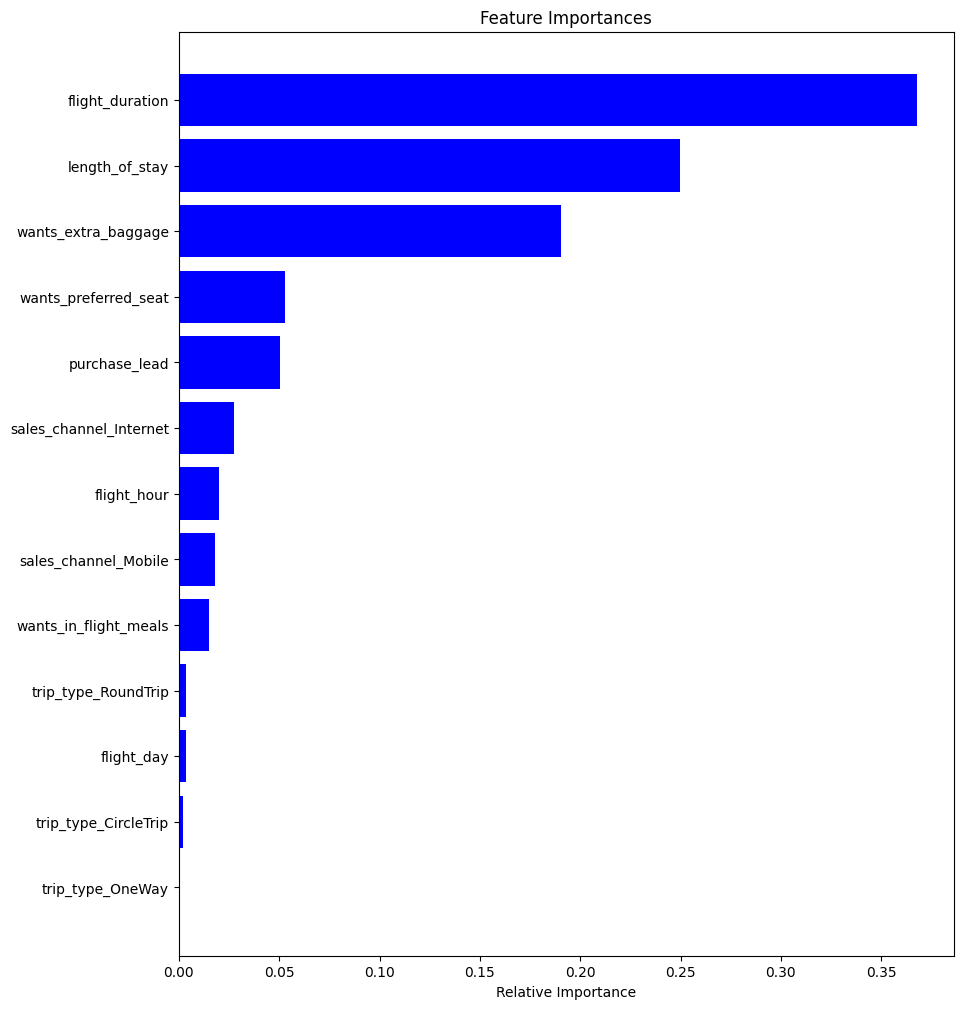

In [76]:
# plottting the features in order of importance
features = [i.split("__")[0] for i in X.columns]
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Most important features are purchase_lead, flight_hour, length_of_stay, flight_duration, flight_day.